In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [2]:
df =pd.read_csv('/home/sidharth/Desktop/Guided_capstone/notebooks/data/adult.csv')

In [3]:
df.drop('fnlwgt',inplace=True,axis=1)

In [4]:
df.isnull().sum()

age                0
workclass          0
education          0
educational-num    0
marital-status     0
occupation         0
relationship       0
race               0
gender             0
capital-gain       0
capital-loss       0
hours-per-week     0
native-country     0
income             0
dtype: int64

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              48842 non-null  int64 
 1   workclass        48842 non-null  object
 2   education        48842 non-null  object
 3   educational-num  48842 non-null  int64 
 4   marital-status   48842 non-null  object
 5   occupation       48842 non-null  object
 6   relationship     48842 non-null  object
 7   race             48842 non-null  object
 8   gender           48842 non-null  object
 9   capital-gain     48842 non-null  int64 
 10  capital-loss     48842 non-null  int64 
 11  hours-per-week   48842 non-null  int64 
 12  native-country   48842 non-null  object
 13  income           48842 non-null  object
dtypes: int64(5), object(9)
memory usage: 5.2+ MB


In [6]:
df['educational-num'] = df['educational-num'].astype('category')

In [7]:
def data_info(df,rem_cols):
    
    df = df.drop(columns=rem_cols)
    
    df_info = pd.DataFrame(np.random.randn(1,9)*12,
                          columns = ['Number of Variables',
                                    'Observations',
                                     'numerical_features',
                                    'categorical_features',
                                    'boolean_features',
                                    'date',
                                    '0% null',
                                    '<30% null',
                                    '>30% null'])
    
    
    df_info.loc[0,'Number of Variables'] = df.shape[1]
    df_info.loc[1,'Number of Variables'] = ','.join(df.columns.to_list())
    
    df_info.loc[0,'Observations'] = df.shape[0]
    df_info.loc[1,'Observations'] = np.nan
    
    df_info.loc[0,'numerical_features'] = df._get_numeric_data().shape[1]
    df_info.loc[1,'numerical_features'] = ','.join(df._get_numeric_data().columns.to_list())
    
    df_info.loc[0,'categorical_features'] = df.select_dtypes(include=['object']).shape[1]
    df_info.loc[1,'categorical_features'] = ','.join(df.select_dtypes(include=['object']).columns.to_list())
     
    df_info.loc[0,'boolean_features'] = df.select_dtypes(include=['bool']).shape[1]
    df_info.loc[1,'boolean_features'] = ','.join(df.select_dtypes(include=['bool']).columns.to_list())
    
    df_info.loc[0,'date'] = df.select_dtypes(include=['datetime64']).shape[1]
    df_info.loc[1,'date'] = ','.join(df.select_dtypes(include=['datetime64']).columns.to_list())
    
    
    null_percent = pd.DataFrame(df.isnull().sum()/df.shape[0])
    null_percent.columns = ['percentage']
    print(null_percent)
    
    df_info.loc[0,'0% null']=null_percent[null_percent['percentage']==0].shape[0]*100 / df.shape[1]
    df_info.loc[1,'0% null'] = np.nan
    
    df_info.loc[0,'<30% null']=null_percent[null_percent['percentage']<0.3].shape[0]*100 / df.shape[1]
    df_info.loc[1,'<30% null'] = np.nan
    
    df_info.loc[0,'>30% null']=null_percent[null_percent['percentage']>0.3].shape[0]*100 / df.shape[1]
    df_info.loc[1,'>30% null'] = np.nan
    
    df_info = df_info.T
    df_info.columns = ['val','Feature Names']
    df_info['val']=df_info['val'].astype('int')
    
    return df_info

In [8]:
data_info(df,[])

                 percentage
age                     0.0
workclass               0.0
education               0.0
educational-num         0.0
marital-status          0.0
occupation              0.0
relationship            0.0
race                    0.0
gender                  0.0
capital-gain            0.0
capital-loss            0.0
hours-per-week          0.0
native-country          0.0
income                  0.0


,val,Feature Names
Number of Variables,14,"age,workclass,education,educational-num,marita..."
Observations,48842,NaN
numerical_features,4,"age,capital-gain,capital-loss,hours-per-week"
categorical_features,9,"workclass,education,marital-status,occupation,..."
boolean_features,0,
date,0,
0% null,100,NaN
<30% null,100,NaN
>30% null,0,NaN


In [9]:
def plot_categories(df,rem_cols=[]):
    df = df.select_dtypes(include=['category','object'])
    for i,col in enumerate(df.columns):
        if(len(df[col].value_counts()) == df.shape[0]):
            continue
        if(df[col].nunique()<=10):
            plt.figure(i)
            sns.countplot(data=df,x=col)
            plt.xticks(rotation=45)
            plt.title('count of {}'.format(col))
            plt.ylim([np.min(df[col].value_counts()),np.max(df[col].value_counts())])
        else:
            
            plt.figure(i)
            #plt.figure().text('Check')
            #sns.countplot(data=df[col].value_counts()[:10],x=df[col].value_counts().index[:10])
            df[col].value_counts()[:10].plot(kind='bar')
            plt.xticks(rotation=45)
            plt.title('count of {}'.format(col))
            plt.ylim([np.min(df[col].value_counts()),np.max(df[col].value_counts())])

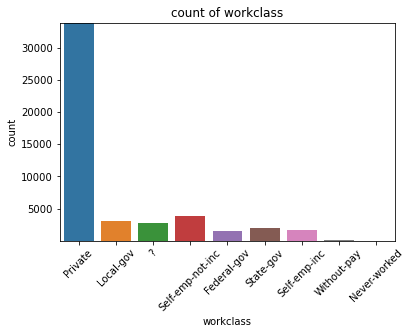

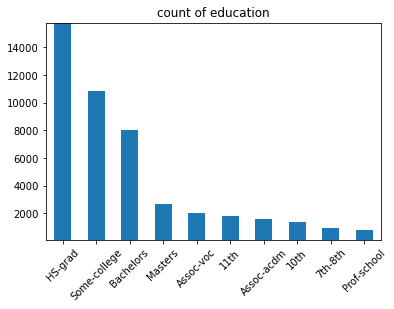

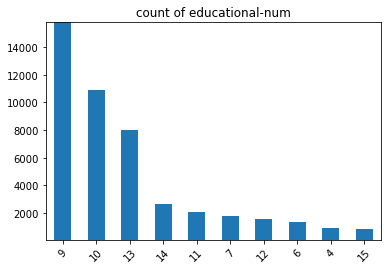

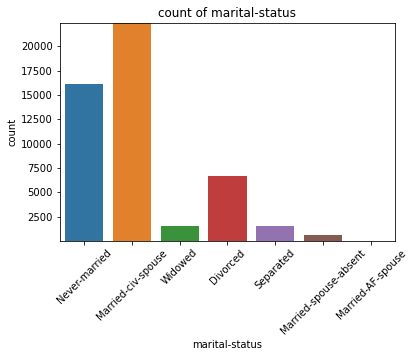

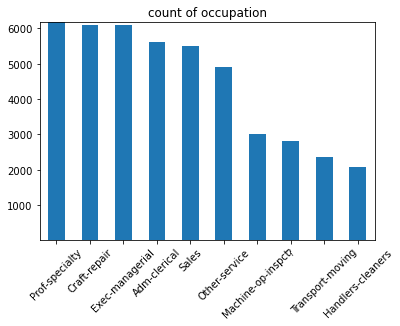

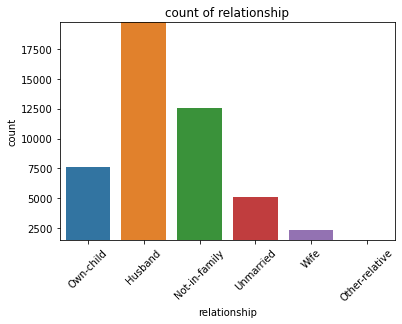

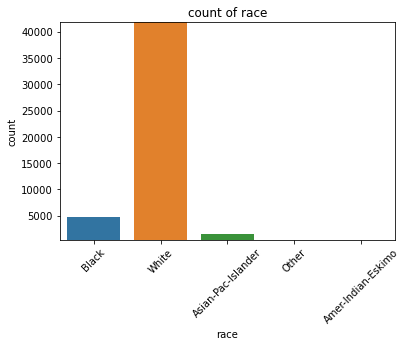

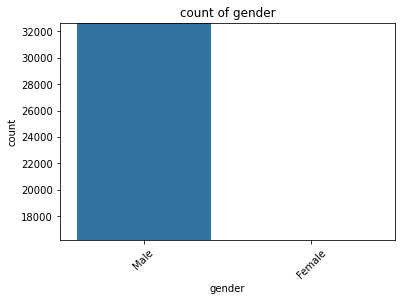

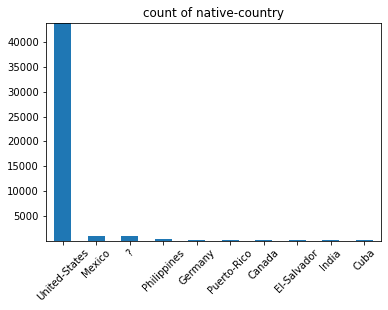

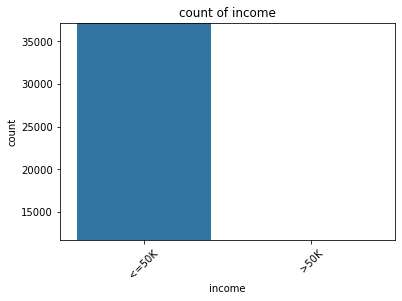

In [10]:
plot_categories(df)

In [11]:
for i in df.select_dtypes(include=['category','object','bool']):
    print(i,len(df[i].value_counts()))

workclass 9
education 16
educational-num 16
marital-status 7
occupation 15
relationship 6
race 5
gender 2
native-country 42
income 2


In [12]:
def plot_numerical(df):
    df = df.select_dtypes(include=['int64'])
    for i in df.columns:
        #plt.figure()
        fig,ax = plt.subplots(1,2,figsize=(10,10))
        
        sns.distplot(df[i],ax=ax[0],kde=True)
        ax[0].set_xlabel(i)
        ax[0].set_ylabel('Probability')
        
        sns.boxplot(i,data=df,ax=ax[1])
        ax[1].set_xlabel(i)
        
        
    

/home/sidharth/anaconda3/envs/springboard/lib/python3.8/site-packages/seaborn/distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)
/home/sidharth/anaconda3/envs/springboard/lib/python3.8/site-packages/seaborn/distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


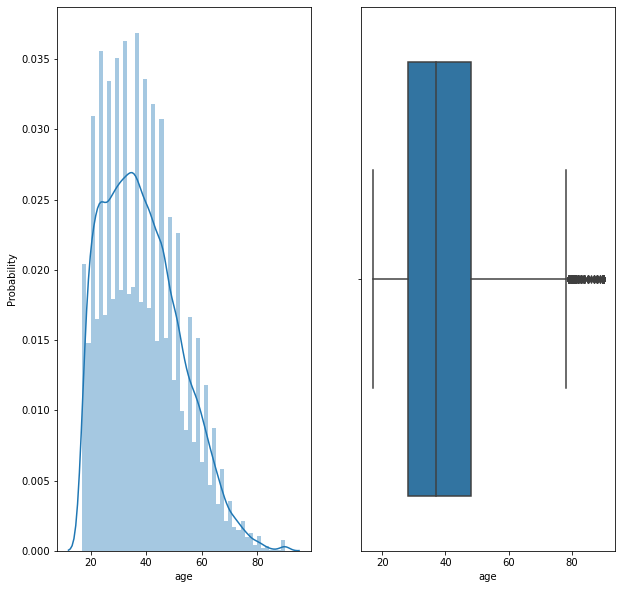

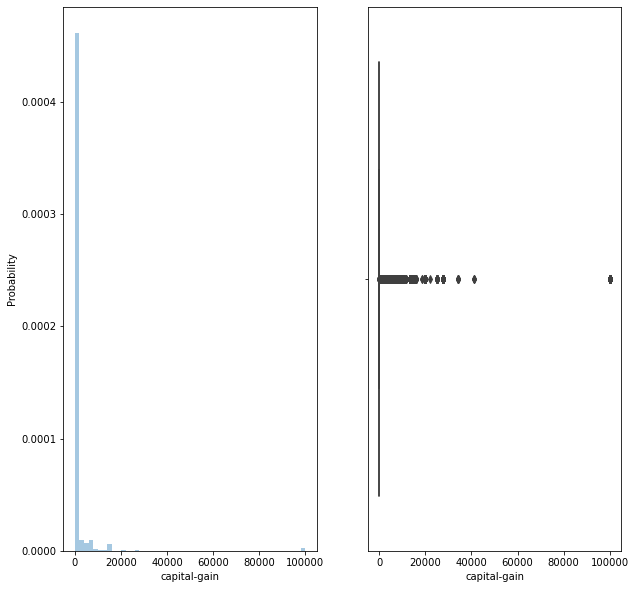

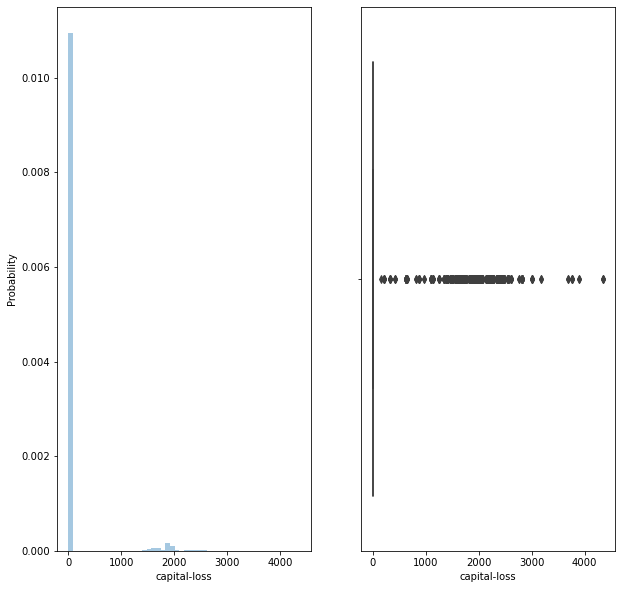

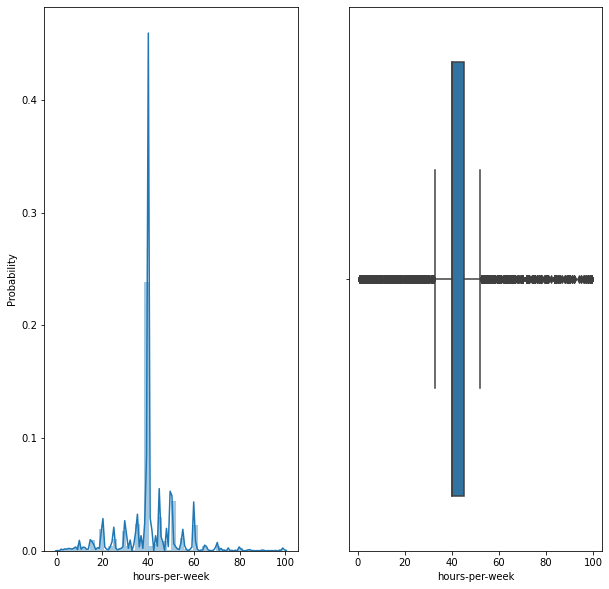

In [13]:
plot_numerical(df)

In [14]:
df.describe()

,age,capital-gain,capital-loss,hours-per-week
count,48842.000000,48842.000000,48842.000000,48842.000000
mean,38.643585,1079.067626,87.502314,40.422382
std,13.710510,7452.019058,403.004552,12.391444
min,17.000000,0.000000,0.000000,1.000000
25%,28.000000,0.000000,0.000000,40.000000
50%,37.000000,0.000000,0.000000,40.000000
75%,48.000000,0.000000,0.000000,45.000000
max,90.000000,99999.000000,4356.000000,99.000000


In [15]:
df.corr()

,age,capital-gain,capital-loss,hours-per-week
age,1.000000,0.077229,0.056944,0.071558
capital-gain,0.077229,1.000000,-0.031441,0.082157
capital-loss,0.056944,-0.031441,1.000000,0.054467
hours-per-week,0.071558,0.082157,0.054467,1.000000


In [16]:
df

,age,workclass,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,27,Private,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
48838,40,Private,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
48839,58,Private,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
48840,22,Private,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [17]:
df.describe()

,age,capital-gain,capital-loss,hours-per-week
count,48842.000000,48842.000000,48842.000000,48842.000000
mean,38.643585,1079.067626,87.502314,40.422382
std,13.710510,7452.019058,403.004552,12.391444
min,17.000000,0.000000,0.000000,1.000000
25%,28.000000,0.000000,0.000000,40.000000
50%,37.000000,0.000000,0.000000,40.000000
75%,48.000000,0.000000,0.000000,45.000000
max,90.000000,99999.000000,4356.000000,99.000000


In [18]:
df.drop(['capital-gain','capital-loss'],inplace=True,axis=1)

In [19]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier


In [20]:
df.groupby('income').describe()

age                                                      \
          count       mean        std   min   25%   50%   75%   max   
income                                                                
<=50K   37155.0  36.872184  14.104118  17.0  25.0  34.0  46.0  90.0   
>50K    11687.0  44.275178  10.558983  19.0  36.0  43.0  51.0  90.0   

       hours-per-week                                                     
                count       mean        std  min   25%   50%   75%   max  
income                                                                    
<=50K         37155.0  38.840048  12.356849  1.0  35.0  40.0  40.0  99.0  
>50K          11687.0  45.452896  11.091176  1.0  40.0  40.0  50.0  99.0

In [21]:
import statsmodels.api as sm

In [22]:
df['income'] = df['income'].map({'<=50K':0,'>50K':1})

In [23]:
df['income'] = df['income'].astype('int')

In [24]:
dummies_x = pd.get_dummies(df.drop('income',axis=1))

In [25]:
dummies_x

,age,hours-per-week,workclass_?,workclass_Federal-gov,workclass_Local-gov,workclass_Never-worked,workclass_Private,workclass_Self-emp-inc,workclass_Self-emp-not-inc,workclass_State-gov,...,native-country_Portugal,native-country_Puerto-Rico,native-country_Scotland,native-country_South,native-country_Taiwan,native-country_Thailand,native-country_Trinadad&Tobago,native-country_United-States,native-country_Vietnam,native-country_Yugoslavia
0,25,40,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,38,50,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,28,40,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,44,40,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,18,30,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,27,38,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
48838,40,40,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
48839,58,40,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
48840,22,20,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [26]:
from sklearn.model_selection import train_test_split

In [27]:
df['income'] = df['income'].astype('category')

In [28]:
x_train,x_test,y_train,y_test = train_test_split(dummies_x,df['income'],random_state=42)

In [29]:
model = sm.GLM(y_train,sm.add_constant(x_train),family=sm.families.Binomial())

In [30]:
log_mod = model.fit()

/home/sidharth/anaconda3/envs/springboard/lib/python3.8/site-packages/statsmodels/genmod/families/links.py:188: RuntimeWarning: overflow encountered in exp
  t = np.exp(-z)
/home/sidharth/anaconda3/envs/springboard/lib/python3.8/site-packages/statsmodels/genmod/families/family.py:893: RuntimeWarning: invalid value encountered in true_divide
  endog_mu = self._clean(endog / mu)
/home/sidharth/anaconda3/envs/springboard/lib/python3.8/site-packages/statsmodels/genmod/families/family.py:894: RuntimeWarning: divide by zero encountered in true_divide
  n_endog_mu = self._clean((1. - endog) / (1. - mu))
/home/sidharth/anaconda3/envs/springboard/lib/python3.8/site-packages/statsmodels/genmod/families/family.py:893: RuntimeWarning: divide by zero encountered in true_divide
  endog_mu = self._clean(endog / mu)
/home/sidharth/anaconda3/envs/springboard/lib/python3.8/site-packages/statsmodels/genmod/families/family.py:894: RuntimeWarning: invalid value encountered in true_divide
  n_endog_mu = sel

In [31]:
log_mod.summary()

/home/sidharth/anaconda3/envs/springboard/lib/python3.8/site-packages/statsmodels/genmod/families/family.py:946: RuntimeWarning: divide by zero encountered in true_divide
  special.gammaln(n - y + 1) + y * np.log(mu / (1 - mu)) +
/home/sidharth/anaconda3/envs/springboard/lib/python3.8/site-packages/statsmodels/genmod/families/family.py:946: RuntimeWarning: divide by zero encountered in log
  special.gammaln(n - y + 1) + y * np.log(mu / (1 - mu)) +
/home/sidharth/anaconda3/envs/springboard/lib/python3.8/site-packages/statsmodels/genmod/families/family.py:946: RuntimeWarning: invalid value encountered in multiply
  special.gammaln(n - y + 1) + y * np.log(mu / (1 - mu)) +
/home/sidharth/anaconda3/envs/springboard/lib/python3.8/site-packages/statsmodels/genmod/families/family.py:947: RuntimeWarning: divide by zero encountered in log
  n * np.log(1 - mu)) * var_weights
/home/sidharth/anaconda3/envs/springboard/lib/python3.8/site-packages/statsmodels/genmod/families/family.py:945: RuntimeWar

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                 income   No. Observations:                36631
Model:                            GLM   Df Residuals:                    36535
Model Family:                Binomial   Df Model:                           95
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                    nan
Date:                Sun, 09 Aug 2020   Deviance:                          nan
Time:                        21:50:33   Pearson chi2:                 3.63e+19
No. Iterations:                   100                                         
Covariance Type:            nonrobust                                         
=============================================================================================================
                                                coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------------
const                                       1.14e+26   1.08e+18   1.06e+08      0.000    1.14e+26    1.14e+26
age                                        1.792e+13   3.38e+04    5.3e+08      0.000    1.79e+13    1.79e+13
hours-per-week                             1.666e+13   3.14e+04    5.3e+08      0.000    1.67e+13    1.67e+13
workclass_?                               -1.605e+25   1.52e+17  -1.06e+08      0.000    -1.6e+25    -1.6e+25
workclass_Federal-gov                     -4.966e+25   4.69e+17  -1.06e+08      0.000   -4.97e+25   -4.97e+25
workclass_Local-gov                       -4.966e+25   4.69e+17  -1.06e+08      0.000   -4.97e+25   -4.97e+25
workclass_Never-worked                    -1.605e+25   1.52e+17  -1.06e+08      0.000    -1.6e+25    -1.6e+25
workclass_Private                         -4.966e+25   4.69e+17  -1.06e+08      0.000   -4.97e+25   -4.97e+25
workclass_Self-emp-inc                    -4.966e+25   4.69e+17  -1.06e+08      0.000   -4.97e+25   -4.97e+25
workclass_Self-emp-not-inc                -4.966e+25   4.69e+17  -1.06e+08      0.000   -4.97e+25   -4.97e+25
workclass_State-gov                       -4.966e+25   4.69e+17  -1.06e+08      0.000   -4.97e+25   -4.97e+25
workclass_Without-pay                     -4.966e+25   4.69e+17  -1.06e+08      0.000   -4.97e+25   -4.97e+25
education_10th                             2.191e+25   2.07e+17   1.06e+08      0.000    2.19e+25    2.19e+25
education_11th                             2.181e+25   2.06e+17   1.06e+08      0.000    2.18e+25    2.18e+25
education_12th                              2.17e+25   2.05e+17   1.06e+08      0.000    2.17e+25    2.17e+25
education_1st-4th                          2.171e+25   2.05e+17   1.06e+08      0.000    2.17e+25    2.17e+25
education_5th-6th                          2.168e+25   2.05e+17   1.06e+08      0.000    2.17e+25    2.17e+25
education_7th-8th                           2.19e+25   2.07e+17   1.06e+08      0.000    2.19e+25    2.19e+25
education_9th                              2.172e+25   2.05e+17   1.06e+08      0.000    2.17e+25    2.17e+25
education_Assoc-acdm                       2.199e+25   2.08e+17   1.06e+08      0.000     2.2e+25     2.2e+25
education_Assoc-voc                        2.164e+25   2.05e+17   1.06e+08      0.000    2.16e+25    2.16e+25
education_Bachelors                        2.186e+25   2.07e+17   1.06e+08      0.000    2.19e+25    2.19e+25
education_Doctorate                        2.179e+25   2.06e+17   1.06e+08      0.000    2.18e+25    2.18e+25
education_HS-grad                          2.172e+25   2.05e+17   1.06e+08      0.000    2.17e+25    2.17e+25
education_Masters                          2.184e+25   2.06e+17   1.06e+08      0.000    2.18e+25    2.18e+25
edu

In [32]:
df.isnull().sum()

age                0
workclass          0
education          0
educational-num    0
marital-status     0
occupation         0
relationship       0
race               0
gender             0
hours-per-week     0
native-country     0
income             0
dtype: int64

In [54]:
clf = LogisticRegression(max_iter=300)

In [34]:
clf.fit(x_train,y_train)

/home/sidharth/anaconda3/envs/springboard/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:938: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   age              48842 non-null  int64   
 1   workclass        48842 non-null  object  
 2   education        48842 non-null  object  
 3   educational-num  48842 non-null  category
 4   marital-status   48842 non-null  object  
 5   occupation       48842 non-null  object  
 6   relationship     48842 non-null  object  
 7   race             48842 non-null  object  
 8   gender           48842 non-null  object  
 9   hours-per-week   48842 non-null  int64   
 10  native-country   48842 non-null  object  
 11  income           48842 non-null  category
dtypes: category(2), int64(2), object(8)
memory usage: 3.8+ MB


In [37]:
from sklearn.preprocessing import scale

In [43]:
x_scaled = scale(x_train.select_dtypes(exclude=['object','category']))

In [44]:
clf.fit(x_scaled,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [47]:
x_train

,age,hours-per-week,workclass_?,workclass_Federal-gov,workclass_Local-gov,workclass_Never-worked,workclass_Private,workclass_Self-emp-inc,workclass_Self-emp-not-inc,workclass_State-gov,...,native-country_Portugal,native-country_Puerto-Rico,native-country_Scotland,native-country_South,native-country_Taiwan,native-country_Thailand,native-country_Trinadad&Tobago,native-country_United-States,native-country_Vietnam,native-country_Yugoslavia
27859,41,12,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
5654,39,37,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3779,34,50,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
10522,56,40,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
22461,71,2,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11284,36,40,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
44732,34,50,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
38158,28,40,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
860,46,40,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0


In [48]:
from sklearn.preprocessing import StandardScaler

In [49]:
scaler = StandardScaler()

In [51]:
x_train[['age','hours-per-week']] = scaler.fit_transform(x_train[['age','hours-per-week']])

<ipython-input-51-14a1b4ab8014>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x_train[['age','hours-per-week']] = scaler.fit_transform(x_train[['age','hours-per-week']])
/home/sidharth/anaconda3/envs/springboard/lib/python3.8/site-packages/pandas/core/indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


In [55]:
clf.fit(x_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=300,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [56]:
x_test[['age','hours-per-week']] = scaler.transform(x_test[['age','hours-per-week']])

<ipython-input-56-919c69349649>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x_test[['age','hours-per-week']] = scaler.transform(x_test[['age','hours-per-week']])
/home/sidharth/anaconda3/envs/springboard/lib/python3.8/site-packages/pandas/core/indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


In [57]:
y_pred = clf.predict(x_test)

In [59]:
from sklearn.metrics import confusion_matrix,accuracy_score,f1_score,classification_report

In [62]:
cf=confusion_matrix(y_test,y_pred)

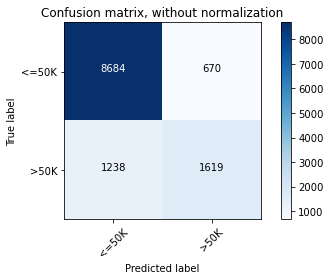

In [63]:
import itertools
import numpy as np
import matplotlib.pyplot as plt

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
   

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)print(classification_report(y_test,y_pred))
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()




# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cf, classes=['<=50K','>50K'],
                      title='Confusion matrix, without normalization')
#plt.savefig('figures/RF_cm_multi_class.png')

plt.show()

In [64]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.88      0.93      0.90      9354
           1       0.71      0.57      0.63      2857

    accuracy                           0.84     12211
   macro avg       0.79      0.75      0.77     12211
weighted avg       0.84      0.84      0.84     12211



In [67]:
670 / (670+8684)

0.07162711139619414

In [68]:
from sklearn.metrics import plot_roc_curve

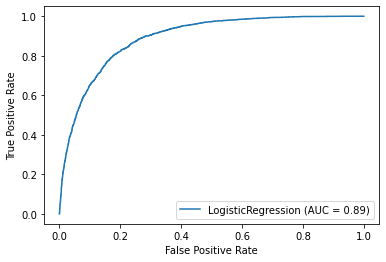

In [69]:
plot_roc_curve(clf,x_test,y_test)

In [80]:
clf.coef_

array([[ 0.39918987,  0.36678565, -0.13101083,  0.66611902, -0.0300247 ,
        -0.18502308,  0.20425576,  0.47085024, -0.31451255, -0.22208579,
        -0.403756  , -0.42398182, -0.33278529, -0.25137033, -0.76365584,
        -0.49766951, -0.75163854, -0.51258159,  0.2648483 ,  0.2579294 ,
         0.59356128,  1.06545729,  0.01836635,  0.77476753, -0.63033765,
         1.04385625,  0.20004626, -0.63033765, -0.76365584, -0.49766951,
        -0.75163854, -0.51258159, -0.42398182, -0.33278529, -0.25137033,
         0.01836635,  0.20004626,  0.2579294 ,  0.2648483 ,  0.59356128,
         0.77476753,  1.04385625,  1.06545729, -0.59585487,  1.44266567,
         1.64810368, -0.40156596, -1.00160868, -0.58694251, -0.44998525,
        -0.31603391,  0.08528375,  0.42200302,  0.14143688,  0.86595096,
        -0.80279532, -0.54311492, -0.21844833, -0.79466922, -1.05884755,
         0.69576245,  0.53789616,  0.40123253,  0.65645512, -0.01729953,
        -0.20563676,  0.42632545, -0.58401587, -0.7

In [85]:
important_params = pd.DataFrame({'Features':x_train.columns,'coeffecient':clf.coef_.ravel()}).sort_values(by='coeffecient',ascending=False)

In [86]:
important_params

,Features,coeffecient
45,marital-status_Married-civ-spouse,1.648104
44,marital-status_Married-AF-spouse,1.442666
21,education_Doctorate,1.065457
42,educational-num_16,1.065457
41,educational-num_15,1.043856
...,...,...
58,occupation_Other-service,-0.794669
55,occupation_Farming-fishing,-0.802795
47,marital-status_Never-married,-1.001609
59,occupation_Priv-house-serv,-1.058848
